In [1]:
import dask
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import copy
import astropy
import hdbscan
import pandas as pd
from astropy.coordinates import Distance
from astropy import units as u
from astropy.cosmology import WMAP7
from astropy.io import fits
from collections import Counter
from pandas.api.types import is_numeric_dtype

In [65]:
y = pd.read_csv('iGrID_rcsed_8_clean.csv', index_col='id')
fltr = pd.notna(y.iGrID)

In [3]:
hdul = fits.open('rcsed_v2_8.fits', memmap=astropy.io.fits.Conf.use_memmap.defaultvalue, lazy_load_hdus=True)

In [4]:
cols = hdul[1].columns

In [5]:
data = hdul[1].data

In [6]:
hdul.close()
del hdul

In [7]:
DATA = pd.DataFrame(np.array(data).byteswap().newbyteorder())
del data

In [8]:
DATA.shape

(4109726, 479)

In [29]:
type_stats = {}
for c in DATA.columns:
    t = DATA[c].dtype
    if t in type_stats:
        type_stats[DATA[c].dtype] += 1
    else:
        type_stats[DATA[c].dtype] = 1

print(type_stats)

{dtype('<i8'): 2, dtype('float64'): 410, dtype('int32'): 10, dtype('int16'): 9, dtype('O'): 9, dtype('float32'): 37, dtype('uint8'): 2}


In [45]:
for c in DATA.columns:
    t = DATA[c].dtype
    if t == '<i8':
        print(c)

ind
bestObjID_sdss


In [49]:
DATA.drop(['ind', 'bestObjID_sdss'], inplace=True, axis=1)
DATA = DATA.select_dtypes(include='number')

In [50]:
DATA.shape

(4109726, 468)

In [51]:
type_stats = {}
for c in DATA.columns:
    t = DATA[c].dtype
    if t in type_stats:
        type_stats[DATA[c].dtype] += 1
    else:
        type_stats[DATA[c].dtype] = 1

print(type_stats)

{dtype('float64'): 410, dtype('int32'): 10, dtype('int16'): 9, dtype('float32'): 37, dtype('uint8'): 2}


In [67]:
for c in DATA.columns:
    print(c, ' | ', DATA[c].isna().sum()/DATA.shape[0] , '% |', DATA[fltr][c].isna().sum()/DATA[fltr].shape[0], '%')

ra  |  0.0 % | 0.0 %
dec  |  0.0 % | 0.0 %
z_sdss  |  0.232334710391885 % | 0.0 %
zErr_sdss  |  0.23176581601790483 % | 0.0 %
specObjID_sdss  |  0.23176581601790483 % | 0.0 %
bossSpecObjID_sdss  |  0.0 % | 0.0 %
mjd_sdss  |  0.0 % | 0.0 %
plate_sdss  |  0.0 % | 0.0 %
fiberID_sdss  |  0.0 % | 0.0 %
z_2df  |  0.9463618742466042 % | 0.9594772545889865 %
q_z_2df  |  0.0 % | 0.0 %
z_6df  |  0.9717256089578721 % | 0.9912983838786912 %
quality_6df  |  0.0 % | 0.0 %
specid_6df  |  0.0 % | 0.0 %
recno_uzc  |  0.0 % | 0.0 %
z_uzc  |  0.9952880070350189 % | 0.9764864325618515 %
z_err_uzc  |  0.9952865470836741 % | 0.9764764565043894 %
z_hectospec  |  0.9612275854886676 % | 0.9952015163607343 %
z_cfa  |  0.9936032231832487 % | 0.9754165003990423 %
z_err_cfa  |  0.9936095496390757 % | 0.9754239824421389 %
z_lamost  |  0.9559082527642963 % | 0.8736033519553073 %
z_err_lamost  |  0.9452097293104211 % | 0.8335370111731844 %
obsid_lamost  |  0.0 % | 0.0 %
lmjd_lamost  |  0.0 % | 0.0 %
mjd_lamost  |  0.

integmag_r_legacy  |  0.07372754290675339 % | 0.005020450917797286 %
integmag_z_legacy  |  0.07375528198230247 % | 0.0050104748603351955 %
kronmag_NUV_galex  |  0.6486089340262586 % | 0.29613427773343975 %
kronmagerr_NUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
kronrad_NUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
kronmag_FUV_galex  |  0.663627210183842 % | 0.3014390462889066 %
kronmagerr_FUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
kronrad_FUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
aper2mag_u_sdss  |  0.19692286055080072 % | 0.0 %
aper2magerr_u_sdss  |  0.19692286055080072 % | 0.0 %
aper2mag_g_sdss  |  0.19692286055080072 % | 0.0 %
aper2magerr_g_sdss  |  0.19692286055080072 % | 0.0 %
aper2mag_r_sdss  |  0.19692286055080072 % | 0.0 %
aper2magerr_r_sdss  |  0.19692286055080072 % | 0.0 %
aper2mag_i_sdss  |  0.19692286055080072 % | 0.0 %
aper2magerr_i_sdss  |  0.19692286055080072 % | 0.0 %
aper2mag_z_sdss  |  0.19692286055080072 % | 0.0

aper3mag_NUV_galex  |  0.6486089340262586 % | 0.29613427773343975 %
aper3magerr_NUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
aper3mag_FUV_galex  |  0.663627210183842 % | 0.3014390462889066 %
aper3magerr_FUV_galex  |  0.6032338895585739 % | 0.2630387071029529 %
aper3mag_w1_wise  |  0.5380872106802254 % | 0.5525588587390263 %
aper3magerr_w1_wise  |  0.536393423795163 % | 0.5520650438946528 %
aper3mag_w2_wise  |  0.5380872106802254 % | 0.5525588587390263 %
aper3magerr_w2_wise  |  0.536393423795163 % | 0.5520650438946528 %
aper3mag_w3_wise  |  0.5380872106802254 % | 0.5525588587390263 %
aper3magerr_w3_wise  |  0.536393423795163 % | 0.5520650438946528 %
aper3mag_w4_wise  |  0.5380872106802254 % | 0.5525588587390263 %
aper3magerr_w4_wise  |  0.536393423795163 % | 0.5520650438946528 %
aper6mag_U_vst  |  0.9765619411123758 % | 0.989036312849162 %
aper6magerr_U_vst  |  0.9765619411123758 % | 0.989036312849162 %
aper6mag_G_vst  |  0.9452995163181195 % | 0.9832551875498803 %
aper6mag

kcorr_aper2mag_H_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_ks_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_g_legacy  |  0.49283626207683917 % | 0.03587639664804469 %
kcorr_aper2mag_r_legacy  |  0.49283626207683917 % | 0.03587639664804469 %
kcorr_aper2mag_z_legacy  |  0.5038024432772403 % | 0.05609537110933759 %
kcorr_aper2mag_u_sdss  |  0.5746614251169057 % | 3.741021548284118e-05 %
kcorr_aper2mag_g_sdss  |  0.5746614251169057 % | 3.741021548284118e-05 %
kcorr_aper2mag_r_sdss  |  0.5746614251169057 % | 3.741021548284118e-05 %
kcorr_aper2mag_i_sdss  |  0.5746614251169057 % | 3.741021548284118e-05 %
kcorr_aper2mag_z_sdss  |  0.5746614251169057 % | 3.741021548284118e-05 %
kcorr_aper2mag_Y_ukidss  |  0.8327749830523982 % | 0.6255536711891461 %
kcorr_aper2mag_J_ukidss  |  0.8327749830523982 % | 0.6255536711891461 %
kcorr_aper2mag_H_ukidss  |  0.8327749830523982 % | 0.6255536711891461 %
kcorr_aper2mag_K_ukidss  |  0.8327749830523982 % | 0.62555367

In [78]:
for c in DATA.columns:
    print(c, DATA[c].value_counts().head(5))
    print(DATA[c].min(), DATA[c].median(), DATA[c].max())
    print()

ra 202.454996    11
202.288329    11
308.501958    11
308.551971    10
309.135304    10
Name: ra, dtype: int64
1.91320889939561e-05 176.506985 359.99994

dec 60.169022    23
46.708668    21
46.725334    21
60.185688    19
60.235687    17
Name: dec, dtype: int64
-87.1364722 17.020318500000002 89.09305572509766

z_sdss 0.004153    334
0.004153    300
7.011245    263
0.003460     20
1.002166     19
Name: z_sdss, dtype: int64
0.001600324 0.48972605 7.05193

zErr_sdss -1.0    5738
 0.0     847
-4.0     743
-6.0     223
-5.0     132
Name: zErr_sdss, dtype: int64
-6.0 0.00011573495 6753.216

specObjID_sdss 5.821645e+17    4
1.031479e+18    3
3.232457e+17    3
7.914006e+18    3
3.243238e+17    3
Name: specObjID_sdss, dtype: int64
2.994896774449336e+17 5.355974808608985e+18 1.3177803682144866e+19

bossSpecObjID_sdss  0             982551
-2147483648    952494
 966442             3
 2379700            3
 590855             3
Name: bossSpecObjID_sdss, dtype: int64
-2147483648 464174.0 3515409

mj

petromagerr_i_sdss -9999.000000    187
 0.012200        79
 0.012955        78
 0.012544        75
 0.013130        74
Name: petromagerr_i_sdss, dtype: int64
-9999.0 0.075587 185336000.0

petror50_i_sdss -9999.00000    74031
 1.23638          42
 1.18122          40
 1.18280          40
 1.29666          39
Name: petror50_i_sdss, dtype: int64
-9999.0 1.32362 257.468

petromag_z_sdss 20.234563    4
20.953153    3
21.639332    2
22.195232    2
20.224448    2
Name: petromag_z_sdss, dtype: int64
-10000.629769966006 18.909718675407582 40.8577448249422

petromagerr_z_sdss -9999.000000    201
 0.026039        36
 0.031669        35
 0.033696        35
 0.030710        35
Name: petromagerr_z_sdss, dtype: int64
-9999.0 0.181755 17611.8

petror50_z_sdss -9999.00000    107565
 1.23874           37
 1.16903           35
 1.03788           35
 1.36855           34
Name: petror50_z_sdss, dtype: int64
-9999.0 1.30273 257.179

petromag_g_des 24.232352    4
17.946389    2
20.428920    2
19.879603    2


-999999488.1763326 17.375769620019945 28.23486396881193

petromagerr_Y_viking -9.999995e+08    15170
 2.169459e-03        4
 8.926054e-03        3
 3.599627e-02        3
 8.642704e-04        3
Name: petromagerr_Y_viking, dtype: int64
-999999500.0 0.031117524951696396 234.91862

petromag_J_viking -9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    3
Name: petromag_J_viking, dtype: int64
-999999488.1264964 16.867907514278777 25.328483310416342

petromagerr_J_viking -9.999995e+08    15242
 1.589670e-03        4
 5.848137e-03        3
 1.917118e-02        3
 3.883988e-02        3
Name: petromagerr_J_viking, dtype: int64
-999999500.0 0.028360586613416672 19.49928

petromag_H_viking -9.999995e+08    5
-9.999995e+08    4
-9.999995e+08    4
-9.999995e+08    4
-9.999995e+08    4
Name: petromag_H_viking, dtype: int64
-999999488.0791276 15.934598341975827 25.4934251040183

petromagerr_H_viking -9.999995e+08    32193
 1.780593e-03        4
 1.472667e-02    

11.199816181910933 19.191892504779847 27.571142808750867

kronmagerr_r_kids 0.00177    342
0.00187    338
0.00184    336
0.00261    335
0.00211    335
Name: kronmagerr_r_kids, dtype: int64
5e-05 0.00536 3.71129

kronmag_i_kids 19.842198    2
18.208607    2
18.215012    2
18.240845    2
19.942056    1
Name: kronmag_i_kids, dtype: int64
10.135275464330316 18.76479090397343 29.43064906166941

kronmagerr_i_kids 0.00382    169
0.00427    167
0.00435    161
0.00366    160
0.00310    160
Name: kronmagerr_i_kids, dtype: int64
8e-05 0.01218 67.45069

kronrad_kids 3.5000    77704
3.6189       39
3.5229       39
3.5427       36
3.5012       36
Name: kronrad_kids, dtype: int64
3.5 3.707200050354004 14.0249

integmag_g_legacy inf          68656
27.049852        6
23.085455        4
24.124251        4
20.873152        3
Name: integmag_g_legacy, dtype: int64
-8.126783844413236 20.917993713699282 inf

integmag_r_legacy inf          63781
23.923154        6
23.518293        4
21.726288        4
24.3737

aper2magerr_K_ukidss -9.999995e+08    87816
 3.704834e-02       45
 3.988457e-02       44
 4.267120e-02       43
 4.544640e-02       43
Name: aper2magerr_K_ukidss, dtype: int64
-999999488.0 0.034393310546875 2.3239994049072266

aper2mag_Z_viking -9.999995e+08    7608
 1.904948e+01       5
 1.909473e+01       4
 1.831464e+01       4
 1.798592e+01       4
Name: aper2mag_Z_viking, dtype: int64
-999999488.0 18.79543972015381 23.190074920654297

aper2magerr_Z_viking -9.999995e+08    7608
 5.010605e-03      57
 4.577637e-03      56
 4.182816e-03      55
 4.619598e-03      54
Name: aper2magerr_Z_viking, dtype: int64
-999999488.0 0.012391090393066406 0.6196842193603516

aper2mag_Y_viking -9.999995e+08    15170
 1.828570e+01        4
 1.783506e+01        4
 1.912584e+01        4
 1.844514e+01        4
Name: aper2mag_Y_viking, dtype: int64
-999999488.0 18.35482883453369 22.229511260986328

aper2magerr_Y_viking -9.999995e+08    15170
 6.689072e-03       42
 7.028580e-03       41
 6.528854e-03    

aper3mag_g_sdss 23.765287    4
22.830948    3
19.777808    2
22.655193    2
19.580063    2
Name: aper3mag_g_sdss, dtype: int64
-10003.26217751205 21.755899421894924 31.735169115439056

aper3magerr_g_sdss -9999.000000    229
 0.009805       106
 0.011209       101
 0.010455       100
 0.011431        98
Name: aper3magerr_g_sdss, dtype: int64
-9999.0 0.07656300000000016 63912200.0

aper3mag_r_sdss 22.479124    4
22.215424    3
21.038580    2
17.292125    2
17.854049    2
Name: aper3mag_r_sdss, dtype: int64
-10001.94855453074 20.698799784993753 29.8838704051543

aper3magerr_r_sdss -9999.000000    179
 0.007121       140
 0.008553       128
 0.006507       128
 0.007173       128
Name: aper3magerr_r_sdss, dtype: int64
-9999.0 0.047049999999998704 31473200.0

aper3mag_i_sdss 21.158352    4
21.835846    3
20.195156    2
16.934862    2
20.387903    2
Name: aper3mag_i_sdss, dtype: int64
-10001.191092163324 20.06317310324684 31.013756364695727

aper3magerr_i_sdss -9999.000000    190
 0.005998  

-1163792507.6160834 -999999487.9999998 1.6197630601404818

aper3mag_j_vhs -9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    3
-9.999995e+08    2
Name: aper3mag_j_vhs, dtype: int64
-1182431831.0040627 17.153143705981353 182432354.93283343

aper3magerr_j_vhs -9.999995e+08    8592
 3.947158e-03       3
 3.971828e-02       3
 2.386609e-03       3
 1.063088e-02       3
Name: aper3magerr_j_vhs, dtype: int64
-1182431827.2415652 0.02197828497268972 182432339.02896985

aper3mag_h_vhs -9.999995e+08    8
-9.999995e+08    7
-9.999995e+08    7
-9.999995e+08    7
-9.999995e+08    7
Name: aper3mag_h_vhs, dtype: int64
-1182431830.5405085 15.121837794679617 21.327003581241495

aper3magerr_h_vhs -9.999995e+08    182940
 3.120621e-03         3
 1.357539e-02         3
 2.177032e-03         3
 6.503982e-02         3
Name: aper3magerr_h_vhs, dtype: int64
-1182431827.0715065 0.00828812840044968 11.952371748829162

aper3mag_ks_vhs -9.999995e+08    5
-9.999995e+08    5
-9.999995e+08    

aper6magerr_H_ukidss -9.999995e+08    112881
 3.563636e-03         4
 2.509264e-03         3
 8.009436e-01         3
 3.705992e-02         3
Name: aper6magerr_H_ukidss, dtype: int64
-1192916445.4502623 0.049757671267324 517241118.15089095

aper6mag_K_ukidss -9.999995e+08    87816
 1.296908e+01        4
 1.529463e+01        3
 1.375496e+01        3
 1.736881e+01        3
Name: aper6mag_K_ukidss, dtype: int64
-1192916449.8044493 15.81071240548652 517241138.1976204

aper6magerr_K_ukidss -9.999995e+08    87816
 4.634096e-03        4
 2.182140e-02        3
 3.756677e-03        3
 7.474636e-02        3
Name: aper6magerr_K_ukidss, dtype: int64
-1192916452.7112386 0.04973534746694419 517241114.54481864

aper6mag_Z_viking -9.999995e+08    7608
 1.562463e+01       4
 1.671272e+01       3
 1.578524e+01       3
 1.729411e+01       3
Name: aper6mag_Z_viking, dtype: int64
-1192916450.0939353 18.13403913048196 28.15591498923324

aper6magerr_Z_viking -9.999995e+08    7608
 4.739562e-03       4
 7.0659

kcorr_kronmag_g_panstarrs 0.453072    2
0.603996    2
0.514758    2
0.216033    2
0.378951    2
Name: kcorr_kronmag_g_panstarrs, dtype: int64
-52885054706260.21 0.29134166483718393 1323151281753.2368

kcorr_kronmag_r_panstarrs  0.074218    2
 0.022623    2
-0.028203    2
 0.120447    2
 0.154268    2
Name: kcorr_kronmag_r_panstarrs, dtype: int64
-273800374818.223 0.08824584656760234 56502988930.16588

kcorr_kronmag_i_panstarrs -0.003290    2
 0.057328    2
 0.009801    2
 0.071867    2
-0.021270    2
Name: kcorr_kronmag_i_panstarrs, dtype: int64
-106728668077.98045 0.041499701951509795 90669006155.0318

kcorr_kronmag_z_panstarrs  0.053200    2
 0.078209    2
-0.018441    2
 0.025083    2
 0.013643    2
Name: kcorr_kronmag_z_panstarrs, dtype: int64
-359014781157.3603 0.011919528717350258 447429120179.7533

kcorr_kronmag_y_panstarrs -4.458592    1
-4.205112    1
 0.249974    1
-5.313924    1
 0.054952    1
Name: kcorr_kronmag_y_panstarrs, dtype: int64
-1.4647098636080043e+27 -5.193262867

-1619489255.2879956 0.06588004050473885 1574.4167505170283

kcorr_petromag_r_skymapper -0.007753    1
-0.003212    1
 0.056882    1
 0.060359    1
-0.204182    1
Name: kcorr_petromag_r_skymapper, dtype: int64
-1602754.5595535114 0.035769618018148715 582.1052373478308

kcorr_petromag_i_skymapper  0.002770    1
 0.027427    1
 0.009135    1
-0.112504    1
 0.033711    1
Name: kcorr_petromag_i_skymapper, dtype: int64
-377051.76235461165 0.015403108592764028 1383.412055982915

kcorr_petromag_z_skymapper  0.013746    2
 0.039560    2
-0.219826    2
-0.041828    1
-0.103122    1
Name: kcorr_petromag_z_skymapper, dtype: int64
-49.05475455840661 0.006561510017922663 992420.32369028

kcorr_petromag_Y_viking -0.586475    2
-0.371464    2
-0.660997    2
-0.435554    2
-0.827981    2
Name: kcorr_petromag_Y_viking, dtype: int64
-1.8366653147724913e+29 -0.34411959243006407 6.1934578520378476e+29

kcorr_petromag_J_viking -1.989744e-01    2
-1.774433e-01    2
-2.786656e-02    2
 4.547291e+25    2
-8.8

kcorr_aper3mag_ks_vhs -4.318566e-01    2
-4.014779e-01    2
-4.870023e-01    2
 1.069492e+26    2
-4.778106e-01    2
Name: kcorr_aper3mag_ks_vhs, dtype: int64
-1.0447486148945602e+29 -0.3515985496794067 7.4922791857016265e+28

kcorr_aper3mag_g_legacy 0.311044    2
0.699930    2
0.629346    2
0.644625    2
0.458959    2
Name: kcorr_aper3mag_g_legacy, dtype: int64
-6667982276.954497 0.38010315002017014 44027.695827125346

kcorr_aper3mag_r_legacy 0.273927    2
0.040864    2
0.106426    2
0.260657    2
0.144538    2
Name: kcorr_aper3mag_r_legacy, dtype: int64
-4161868.0089892196 0.11429101053489353 22573.206639439173

kcorr_aper3mag_z_legacy -0.012311    2
 0.010838    2
 0.112332    2
 0.120118    2
-0.034459    2
Name: kcorr_aper3mag_z_legacy, dtype: int64
-63493.983851025965 0.017759486449922385 2795073.214999305

kcorr_aper3mag_u_sdss 0.199571    1
0.308004    1
1.550323    1
0.442642    1
0.016205    1
Name: kcorr_aper3mag_u_sdss, dtype: int64
-45925378492.81597 0.5088999142815215 234

kcorr_aper6mag_FUV_galex  0.039371        2
-0.010698        2
 0.228405        2
 18901.548851    2
-6025.115123     2
Name: kcorr_aper6mag_FUV_galex, dtype: int64
-37705693731.48267 0.25856684717697875 103628468732.4774

kcorr_aper6mag_NUV_galex 23.212181     2
130.573622    2
85.158337     2
43.716064     1
295.185870    1
Name: kcorr_aper6mag_NUV_galex, dtype: int64
-8474.306466089944 27.07923272696379 2532738.341525186

kcorr_aper6mag_Y_viking -0.011514    6
-0.011514    4
-0.245132    3
-0.365713    3
-0.218572    3
Name: kcorr_aper6mag_Y_viking, dtype: int64
-1.8366653127548093e+29 -0.4893835535898231 6.1934578767471045e+29

kcorr_aper6mag_J_viking  0.000269    5
 0.000269    5
-0.306184    4
-0.304376    3
-0.299774    3
Name: kcorr_aper6mag_J_viking, dtype: int64
-5.874153864173802e+28 -0.11540899924539977 2.3993534773281023e+27

kcorr_aper6mag_H_viking -0.006092    5
-0.006092    5
-0.288702    4
-0.260164    3
-0.184062    3
Name: kcorr_aper6mag_H_viking, dtype: int64
-1.276

In [80]:
DATA.replace([-2147483648, -9223372036854775808,-32768,255, -999999488.0,
 99.0,
 -99.0,
 9999.0,
 -999.0,
 float('inf'),
 -9999.0], np.nan, inplace=True)

In [82]:
for_del = []
for c in DATA.columns:
    print(c, ' | ', DATA[c].isna().sum()/DATA.shape[0] , '% |', DATA[fltr][c].isna().sum()/DATA[fltr].shape[0], '%')
    if (DATA[c].isna().sum()/DATA.shape[0] > 0.5):
        for_del.append(c)

ra  |  0.0 % | 0.0 %
dec  |  0.0 % | 0.0 %
z_sdss  |  0.232334710391885 % | 0.0 %
zErr_sdss  |  0.23176581601790483 % | 0.0 %
specObjID_sdss  |  0.23176581601790483 % | 0.0 %
bossSpecObjID_sdss  |  0.23176630266835307 % | 0.0 %
mjd_sdss  |  0.23176581601790483 % | 0.0 %
plate_sdss  |  0.23176581601790483 % | 0.0 %
fiberID_sdss  |  0.23374794329354318 % | 0.003132482043096568 %
z_2df  |  0.9463618742466042 % | 0.9594772545889865 %
q_z_2df  |  0.9456533111939823 % | 0.9563397845171588 %
z_6df  |  0.9717256089578721 % | 0.9912983838786912 %
quality_6df  |  0.9717088195174082 % | 0.9912509976057462 %
specid_6df  |  0.9717093061678564 % | 0.9912509976057462 %
recno_uzc  |  0.9952656211144003 % | 0.9763193335993615 %
z_uzc  |  0.9952880070350189 % | 0.9764864325618515 %
z_err_uzc  |  0.9952865470836741 % | 0.9764764565043894 %
z_hectospec  |  0.9612275854886676 % | 0.9952015163607343 %
z_cfa  |  0.9936032231832487 % | 0.9754165003990423 %
z_err_cfa  |  0.9936095496390757 % | 0.97542398244213

kronmag_u_kids  |  0.943471900559794 % | 0.9720695331205108 %
kronmagerr_u_kids  |  0.9434804169426381 % | 0.9720695331205108 %
kronmag_g_kids  |  0.9411459547424816 % | 0.9720445929768555 %
kronmagerr_g_kids  |  0.9411461980677057 % | 0.9720445929768555 %
kronmag_r_kids  |  0.9412561810690055 % | 0.9722565841979249 %
kronmagerr_r_kids  |  0.9412561810690055 % | 0.9722565841979249 %
kronmag_i_kids  |  0.9412002162674592 % | 0.9720595570630487 %
kronmagerr_i_kids  |  0.9412002162674592 % | 0.9720595570630487 %
kronrad_kids  |  0.9410250221060966 % | 0.9719722665602554 %
integmag_g_legacy  |  0.09072259318504446 % | 0.03265413008778931 %
integmag_r_legacy  |  0.08924706902601293 % | 0.029738627294493215 %
integmag_z_legacy  |  0.09212487645161746 % | 0.04135574620909816 %
kronmag_NUV_galex  |  0.6486089340262586 % | 0.29613427773343975 %
kronmagerr_NUV_galex  |  0.615678514820696 % | 0.28260674381484435 %
kronrad_NUV_galex  |  0.6156768115441272 % | 0.28260674381484435 %
kronmag_FUV_gale

aper3mag_h_vhs  |  0.8978031625466029 % | 0.9309482242617717 %
aper3magerr_h_vhs  |  0.8978031625466029 % | 0.9309482242617717 %
aper3mag_ks_vhs  |  0.8978031625466029 % | 0.9309482242617717 %
aper3magerr_ks_vhs  |  0.8978031625466029 % | 0.9309482242617717 %
aper3mag_g_legacy  |  0.09931489349898266 % | 0.029127593774940144 %
aper3magerr_g_legacy  |  0.09931489349898266 % | 0.029127593774940144 %
aper3mag_r_legacy  |  0.09981419685886601 % | 0.025354150039904228 %
aper3magerr_r_legacy  |  0.09981419685886601 % | 0.025354150039904228 %
aper3mag_z_legacy  |  0.10170386054934076 % | 0.0424456304868316 %
aper3magerr_z_legacy  |  0.10170386054934076 % | 0.0424456304868316 %
aper3mag_NUV_galex  |  0.6486089340262586 % | 0.29613427773343975 %
aper3magerr_NUV_galex  |  0.6165892811345574 % | 0.2839684756584198 %
aper3mag_FUV_galex  |  0.663627210183842 % | 0.3014390462889066 %
aper3magerr_FUV_galex  |  0.8239746396718419 % | 0.5397072027134876 %
aper3mag_w1_wise  |  0.5380872106802254 % | 0.5

kcorr_petromag_i_skymapper  |  0.9472174057345916 % | 0.8959572027134877 %
kcorr_petromag_z_skymapper  |  0.921934941648178 % | 0.8740248403830806 %
kcorr_petromag_Y_viking  |  0.9556817169806454 % | 0.9514465283320032 %
kcorr_petromag_J_viking  |  0.9556817169806454 % | 0.9514465283320032 %
kcorr_petromag_H_viking  |  0.9556817169806454 % | 0.9514465283320032 %
kcorr_petromag_ks_viking  |  0.9556817169806454 % | 0.9514465283320032 %
kcorr_petromag_Z_viking  |  0.9817262756689862 % | 0.9514465283320032 %
kcorr_aper2mag_Y_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_J_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_H_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_ks_vhs  |  0.928002256111478 % | 0.9309557063048683 %
kcorr_aper2mag_g_legacy  |  0.49283626207683917 % | 0.03587639664804469 %
kcorr_aper2mag_r_legacy  |  0.49283626207683917 % | 0.03587639664804469 %
kcorr_aper2mag_z_legacy  |  0.5038024432772403 % | 0.0560953711093375

In [84]:
print(len(for_del))

380


In [85]:
DATA.drop(for_del, axis=1, inplace=True)

In [87]:
DATA.shape

(4109726, 88)

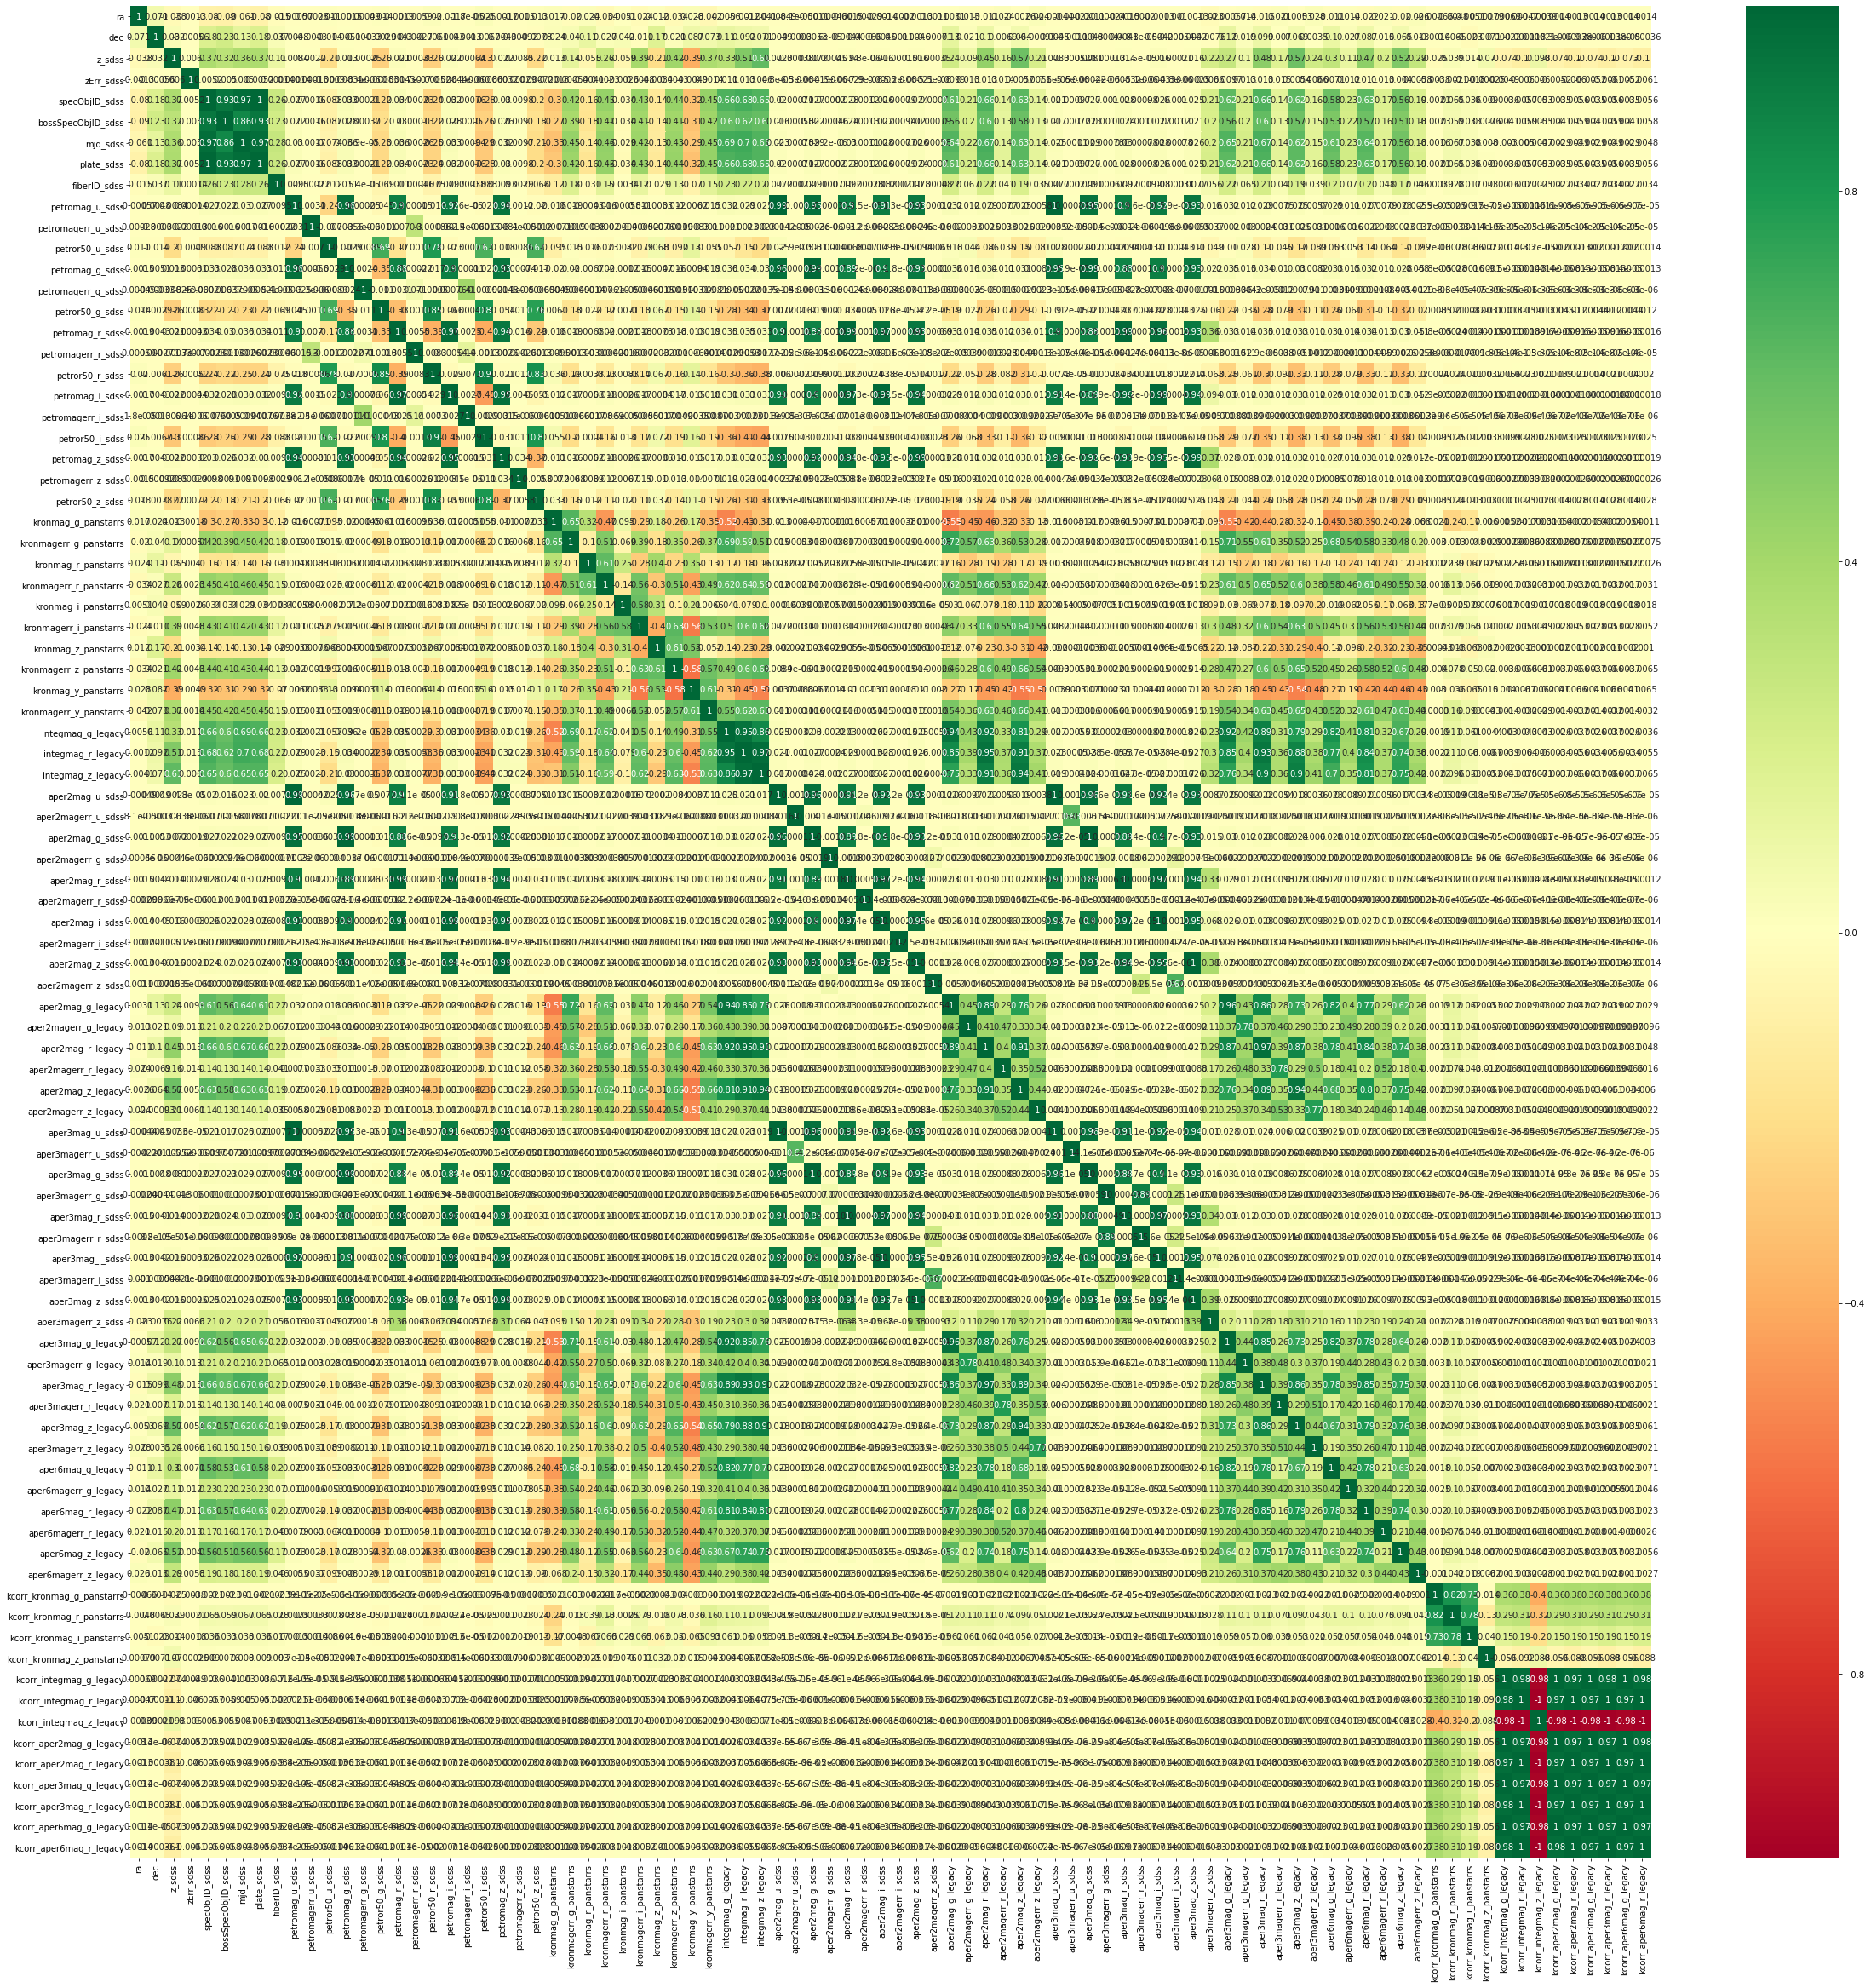

In [88]:
corrmat = DATA.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
g=sns.heatmap(DATA[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('V8corr.png')
del corrmat, top_corr_features, g